<a href="https://colab.research.google.com/github/MarcelJonesRaymond/Neural-Network-and-Deep-Learning/blob/main/Week_1_Mentoring_Session_of_Intro_ot_NN_%26_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf


In [3]:
data=pd.read_csv('/content/Churn_Modelling.csv')

In [4]:
data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
data.tail(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [6]:
data.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9014,9015,15626383,Tang,596,Spain,Male,60,7,121907.97,1,0,1,30314.04,0
9449,9450,15615444,Y?an,663,Germany,Male,28,8,123674.28,2,1,1,87985.20,0
1752,1753,15724466,Swearingen,744,Germany,Female,41,2,84113.41,1,1,0,197548.63,0
6451,6452,15722583,Benjamin,636,Spain,Female,29,6,157576.47,2,1,1,101102.39,0
3418,3419,15632272,Lung,792,France,Female,42,2,0.00,2,1,0,92664.09,0


In [7]:
data.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [8]:
data.shape

(10000, 11)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [12]:
data.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [16]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CreditScore,10000,NaN,NaN,NaN,650.529,96.6533,350,584,652,718,850
Geography,10000,3,France,5014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,10000,2,Male,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,10000,NaN,NaN,NaN,38.9218,10.4878,18,32,37,44,92
Tenure,10000,NaN,NaN,NaN,5.0128,2.89217,0,3,5,7,10
Balance,10000,NaN,NaN,NaN,76485.9,62397.4,0,0,97198.5,127644,250898
NumOfProducts,10000,NaN,NaN,NaN,1.5302,0.581654,1,1,1,2,4
HasCrCard,10000,NaN,NaN,NaN,0.7055,0.45584,0,0,1,1,1
IsActiveMember,10000,NaN,NaN,NaN,0.5151,0.499797,0,0,1,1,1
EstimatedSalary,10000,NaN,NaN,NaN,100090,57510.5,11.58,51002.1,100194,149388,199992


Spliliting into Features and Target values 

In [17]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [18]:
x=data.iloc[:,:-1]
y=data[['Exited']]

In [21]:
x.shape

(10000, 10)

In [22]:
y.shape

(10000, 1)

In [29]:
label=LabelEncoder()
x['Geography']=label.fit_transform(x['Geography'])

In [30]:
label=LabelEncoder()
x['Gender']=label.fit_transform(x['Gender'])

In [32]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [37]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import Normalizer
ct = ColumnTransformer(
     [("norm1", Normalizer(norm='l1'), [0, 1]),
     ("norm2", Normalizer(norm='l1'), slice(2, 4))])
X = np.array([[0., 1., 2., 2.],
              [1., 1., 0., 1.]])
 # Normalizer scales each row of X to unit norm. A separate scaling
 # is applied for the two first and two last elements of each
 # row independently.
ct.fit_transform(X)

array([[0. , 1. , 0.5, 0.5],
       [0.5, 0.5, 0. , 1. ]])

In [39]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [42]:
CT=ColumnTransformer([('Geography',OneHotEncoder(),[1])],remainder='passthrough')

In [43]:
X=CT.fit_transform(x)

In [49]:
X = X[:,1:]

In [50]:
X.shape

(10000, 11)

In [51]:
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=1,test_size=0.30)

In [52]:
x_train.shape

(7000, 11)

In [53]:
x_test.shape

(3000, 11)

In [54]:
y_train.shape

(7000, 1)

In [55]:
y_test.shape

(3000, 1)

In [59]:
from sklearn.preprocessing import  StandardScaler

In [60]:
scaler=StandardScaler()
X_train=scaler.fit_transform(x_train)
X_test=scaler.fit_transform(x_test)

In [66]:
model=tf.keras.models.Sequential()

In [71]:
# The amount of nodes (dimensions) in hidden layer should be the average of input and output layers, in this case 6.
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model.add(tf.keras.layers.Dense(activation='relu', input_dim=11,units=6, kernel_initializer='uniform'))

In [72]:
model.add(tf.keras.layers.Dense(6,activation='relu',kernel_initializer='uniform'))

In [73]:
model.add(tf.keras.layers.Dense(1,activation='sigmoid',kernel_initializer='uniform'))

In [80]:
model.compile(optimizer='SGD',loss='mse',metrics=['accuracy'])

In [81]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [82]:
model.fit(X_train,y_train,epochs=100,batch_size=20,validation_data=(X_test,y_test))

Epoch 1/100
350/350 [==============================] - 1s 2ms/step - loss: 0.2206 - accuracy: 0.7974 - val_loss: 0.2006 - val_accuracy: 0.7910
Epoch 2/100
350/350 [==============================] - 1s 2ms/step - loss: 0.1875 - accuracy: 0.7986 - val_loss: 0.1813 - val_accuracy: 0.7910
Epoch 3/100
350/350 [==============================] - 1s 2ms/step - loss: 0.1740 - accuracy: 0.7986 - val_loss: 0.1733 - val_accuracy: 0.7910
Epoch 4/100
350/350 [==============================] - 1s 2ms/step - loss: 0.1679 - accuracy: 0.7986 - val_loss: 0.1695 - val_accuracy: 0.7910
Epoch 5/100
350/350 [==============================] - 1s 2ms/step - loss: 0.1649 - accuracy: 0.7986 - val_loss: 0.1676 - val_accuracy: 0.7910
Epoch 6/100
350/350 [==============================] - 1s 2ms/step - loss: 0.1632 - accuracy: 0.7986 - val_loss: 0.1666 - val_accuracy: 0.7910
Epoch 7/100
350/350 [==============================] - 1s 2ms/step - loss: 0.1623 - accuracy: 0.7986 - val_loss: 0.1660 - val_accuracy: 0.7910

In [84]:
yhat=model.predict(X_test)
print(yhat)

[[0.20140979]
 [0.20133   ]
 [0.20153639]
 ...
 [0.20133775]
 [0.2015616 ]
 [0.20143339]]


In [85]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

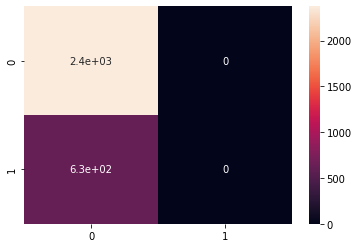

In [89]:
sns.heatmap(confusion_matrix(y_test,yhat.round(), normalize=None),annot=True)

Rebuild the model


In [92]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
classifier = Sequential()
classifier.add(Dense(activation = 'relu', input_dim = 11, units=6, kernel_initializer='uniform'))
classifier.add(Dense(activation = 'relu', units=6, kernel_initializer='uniform')) 
classifier.add(Dense(activation = 'sigmoid', units=1, kernel_initializer='uniform')) 
classifier.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])
classifier.fit(X_train, y_train,           
          validation_data=(X_test,y_test),
          epochs=100,
          batch_size=32)

Epoch 1/100
219/219 [==============================] - 1s 3ms/step - loss: 0.6464 - accuracy: 0.7946 - val_loss: 0.5649 - val_accuracy: 0.7910
Epoch 2/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4786 - accuracy: 0.7994 - val_loss: 0.4361 - val_accuracy: 0.7983
Epoch 3/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4088 - accuracy: 0.8167 - val_loss: 0.3963 - val_accuracy: 0.8310
Epoch 4/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3816 - accuracy: 0.8416 - val_loss: 0.3768 - val_accuracy: 0.8447
Epoch 5/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3682 - accuracy: 0.8454 - val_loss: 0.3653 - val_accuracy: 0.8487
Epoch 6/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3611 - accuracy: 0.8486 - val_loss: 0.3590 - val_accuracy: 0.8527
Epoch 7/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3565 - accuracy: 0.8487 - val_loss: 0.3564 - val_accuracy: 0.8520

In [93]:
yhat_=classifier.predict(X_test)
yhat_

array([[0.04632831],
       [0.13742396],
       [0.06864548],
       ...,
       [0.04497203],
       [0.07543042],
       [0.12125468]], dtype=float32)

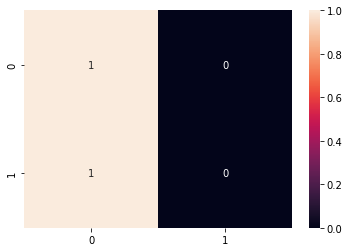

In [96]:
sns.heatmap(confusion_matrix(y_test,yhat.round(), normalize='true'),annot=True)